# Siddon demo

-----------------------------------------------------------------------------------------------------------------------

<u>*The material provided in this notebook can be freely used and modified for educational purposes only. Please cite any content of the notebook as follows:*</u>

- *Panetta D, Camarlinghi N. 3D Image Reconstruction for CT and PET : A Practical Guide with Python. CRC Press; 2020. Available from: https://www.taylorfrancis.com/books/9780429270239*

*For questions, notifications of bugs, or even just for feedback, please contact the authors directly (daniele.panetta@ifc.cnr.it; niccolo.camarlinghi@gmail.com)*

-----------------------------------------------------------------------------------------------------------------------

### Introduction

This notebook will allow you to perform some ray tracing using the Siddon algorithm. The description of the Siddon's algorithm can be found in the original paper "Siddon, R. L. (1985),  Fast calculation of the exact radiological path for a three‐dimensional CT array. Med. Phys., 12: 252-255. doi:10.1118/1.595715". This code is part of the DAPHNE framework (Didactic tomogrAPHic recoNstruction framEwork). The DAPHNE implementation of the Siddon's algorithm is close to the decription given in the original article. However, it was reworked to be more pythonic. The code of the Siddon's algorithm is contained in the ```Algorithm\SiddonProjector.py``` file.

Let's start by importing a few of packages

In [1]:
import sys
import numpy as np
sys.path.append("../") # this to be able to include all the object contained in the modules
from Misc.DataTypes import point_dtype
from Algorithms.SiddonProjector import SiddonProjector
from Misc.Preview import Visualize3dImage
%matplotlib notebook

### Create an instance of the SiddonProjector class 

We now create an instance of the ```SiddonProjector``` class. In order to do that, we must provide to the constructor two parameters:
* image_matrix_size_mm (3 item long np.array,float): array containing the size of the target region (TR) in mm along x-y-z.
* voxel_size_mm (3 item long np.array,float): array containing the size in mm of each voxel. 
**Note**:  the number of voxels in each direction is a derived parameter calculated on top of image_matrix_size_mm and voxel_size_mm (see ExperimentalSetup.py ```ExperimentalSetup::CalculateTRSizeInVoxels```).

In [2]:
image_matrix_size_mm=np.array([100 ,100 ,100]) # The center of the TR is always in (0,0,0). 
                                               # Therefore the TR spans  [-50,50] mm in each direction
voxel_size_mm=np.array([1, 1,10])
s=SiddonProjector(image_matrix_size_mm,voxel_size_mm)

### Cast the ray connecting $P_1$ and $P_2$

Suppose now that we want to cast the line connecting two points (```P1``` and ```P2```). Thank to the Siddon's algorihtm you will be able to know which voxels of the TR are intersected by the line. Note that both ```P1``` and ```P2``` points must be a triplet of ```point_dtype``` (float number) containign the x-y-z coordinates of the point.

In [3]:
P1=np.array((100,100,-50),dtype=point_dtype)
P2=np.array((-100,-100,50),dtype=point_dtype)
img=s.DrawLine(P1,P2)

### Display the result
You can display the obtained image using the ```Visualize3dImage``` utils contained in the ```Misc``` package of DAPHNE. Note that if the selected ray does not intersect the TR, the displayed image will be empty (black). Each intersected voxel contains a grey value proportional to the intersection lenght of the line in the voxel. 

<IPython.core.display.Javascript object>


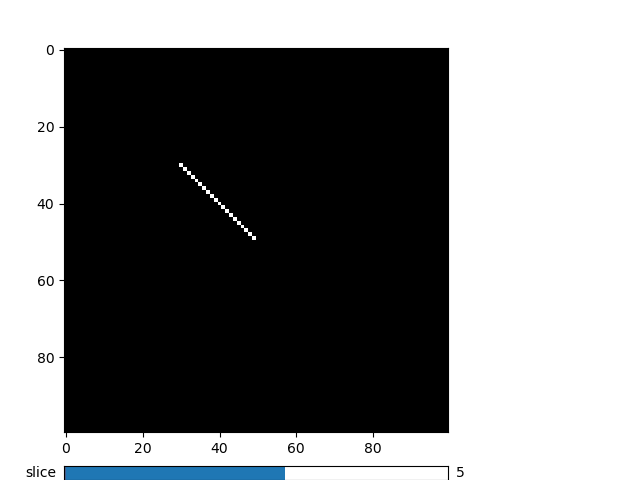

In [4]:
Visualize3dImage(img)

### Cast a ray that doesn't intersect  the TR

In [5]:
P1=np.array((100,100,-70),dtype=point_dtype)
P2=np.array((-100,-100,-70),dtype=point_dtype)
img=s.DrawLine(P1,P2)
print (img.shape)

(100, 100, 10)


<IPython.core.display.Javascript object>


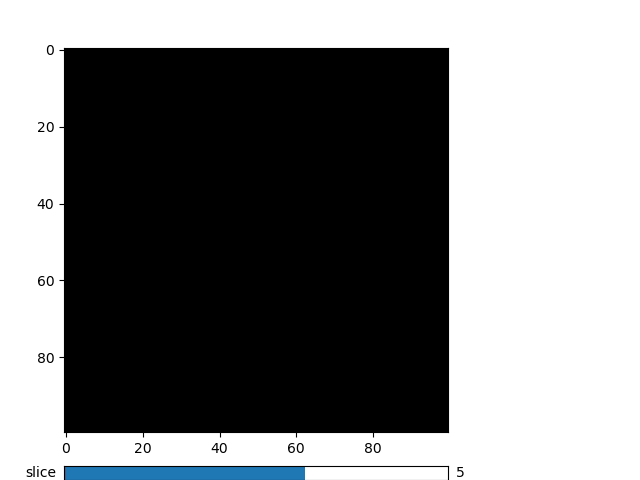

In [6]:
Visualize3dImage(img)